# Nikhil Bhosale
### nbhosale@hawk.iit.edu
### DA_INTERN_ASSESSMENT - Solutions

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('social_data.xlsx - Data.csv')

In [4]:
df.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,03-31-2023 19:55,CSGO,TWITTER,N/A,0,0,Text
1,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
2,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
3,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video


In [5]:
df = df.rename(columns={'Published Date': 'Published_Date', 'Account Type': 'Account_Type', 'Campaign Name': 'Campaign_Name', 'Total Impressions': 'Total_Impressions', 'Total Engagements': 'Total_Engagements', 'Media Type': 'Media_Type'})
df.head()

,Published_Date,Account,Account_Type,Campaign_Name,Total_Impressions,Total_Engagements,Media_Type
0,03-31-2023 19:55,CSGO,TWITTER,N/A,0,0,Text
1,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
2,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
3,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video


In [6]:
#checking null values:
df.isna().sum()

Published_Date       0
Account              0
Account_Type         0
Campaign_Name        0
Total_Impressions    0
Total_Engagements    0
Media_Type           0
dtype: int64

## 1. What is the typical engagement rate we can expect? What’s the likelihood that we can achieve a 15% engagement rate?

In [7]:
# def calculate_engagement_rate(total_engagements, total_impressions):
#     engagement_rate = (sum(total_engagements) / sum(total_impressions)) * 100
#     return engagement_rate

In [8]:
df['engagement_rate'] = (df['Total_Engagements'] / df['Total_Impressions']) * 100

In [9]:
df.head()

,Published_Date,Account,Account_Type,Campaign_Name,Total_Impressions,Total_Engagements,Media_Type,engagement_rate
0,03-31-2023 19:55,CSGO,TWITTER,N/A,0,0,Text,NaN
1,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text,NaN
2,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text,NaN
3,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text,NaN
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video,12.766628


In [10]:
# Calculate the proportion of instances where engagement rate is 15% or higher
likelihood = (df['engagement_rate'] >= 15).mean()

print("Likelihood of achieving a 15% engagement rate:", likelihood)

Likelihood of achieving a 15% engagement rate: 0.06496119574590399


## 2. Does the day of the week and time of posting affect engagement rates?

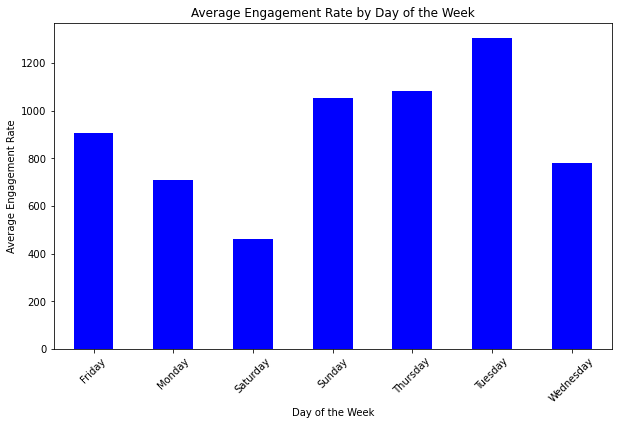

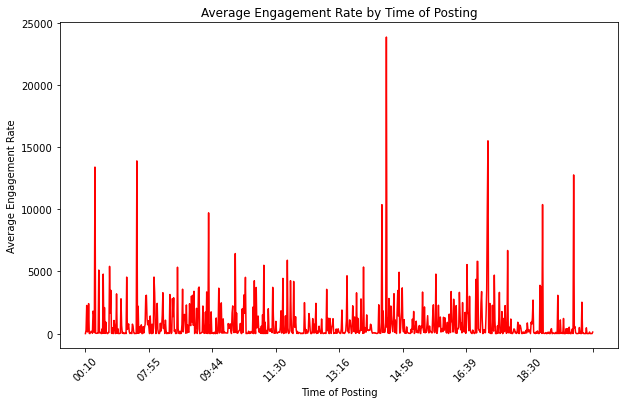

In [11]:
# Convert the "Published Date" column to datetime format
df['Published_Date'] = pd.to_datetime(df['Published_Date'])

# Extract the day of the week and time of posting into separate columns
df['Day of Week'] = df['Published_Date'].dt.day_name()
df['Time of Posting'] = df['Published_Date'].dt.strftime('%H:%M')

# Calculate average engagement rate by day of the week
avg_engagement_by_day = df.groupby('Day of Week')['Total_Engagements'].mean()

# Calculate average engagement rate by time of posting
avg_engagement_by_time = df.groupby('Time of Posting')['Total_Engagements'].mean()

# Plotting the average engagement rates by day of the week
plt.figure(figsize=(10, 6))
avg_engagement_by_day.plot(kind='bar', color='blue')
plt.title('Average Engagement Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.show()

# Plotting the average engagement rates by time of posting
plt.figure(figsize=(10, 6))
avg_engagement_by_time.plot(kind='line', color='red')
plt.title('Average Engagement Rate by Time of Posting')
plt.xlabel('Time of Posting')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.show()

#### According to the graph "Average Engagement Rate by Day of the Week," Tuesday has the highest average engagement rate, while Sunday, Thursday, and Tuesday have the high average engagement rates overall. Saturday has the lowest average engagement rate throughout the entire week.
 
#### We can see that the posting time has an impact on the engagement rate as well; posts between 13:16 and 14:58 will have the highest and maximum engagement rate. The lowest engagement rate for posts is generally between 11:30 and 13:16.

## 3. How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?

In [12]:
unique_entities = df['Account'].value_counts()
num_entries = len(df)

print(unique_entities)
print("Number of Entries:", num_entries)

General             2271
DOTA2                803
CSGO                 270
Valorant              60
Content Creators      53
General               22
Name: Account, dtype: int64
Number of Entries: 3479


In [13]:
df['Account'] = df['Account'].str.lower()
df['Account'] = df['Account'].str.strip()
df.loc[df['Account'] == 'general', 'Account'] = 'General'

unique_entities = df['Account'].value_counts()
num_entries = len(df)

print(unique_entities)
print("Number of Entries:", num_entries)

General             2293
dota2                803
csgo                 270
valorant              60
content creators      53
Name: Account, dtype: int64
Number of Entries: 3479


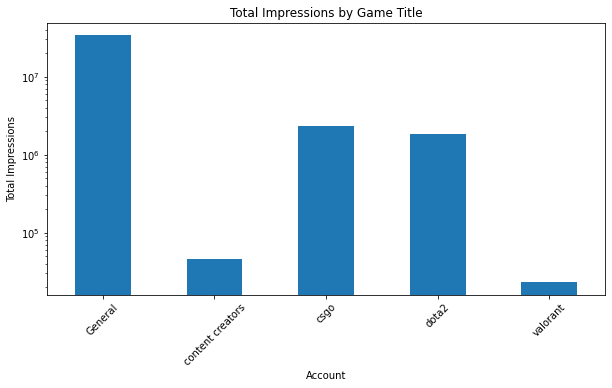

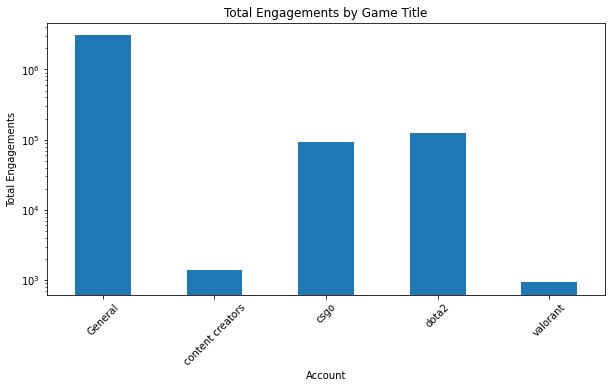

In [14]:
# Group the data by game title and calculate the total impressions and engagements
game_metrics = df.groupby('Account')['Total_Impressions', 'Total_Engagements'].sum()

# Plot the total impressions for each game title
fig, ax = plt.subplots(figsize=(10, 5))
game_metrics['Total_Impressions'].plot(kind='bar', ax=ax)
plt.xlabel('Account')
plt.ylabel('Total Impressions')
plt.title('Total Impressions by Game Title')

# Adjust the y-axis scale to logarithmic
ax.set_yscale('log')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

# Plot the total engagements for each game title
fig, ax = plt.subplots(figsize=(10, 5))
game_metrics['Total_Engagements'].plot(kind='bar', ax=ax)
plt.xlabel('Account')
plt.ylabel('Total Engagements')
plt.title('Total Engagements by Game Title')

# Adjust the y-axis scale to logarithmic
ax.set_yscale('log')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


#### 1) In this case, "game titles" play a significant role in terms of "social performance." 

#### 2) We could see that "engagement by game title" and "general game titles" had the highest impressions, and in my opinion, "general game titles" are simply other games.

#### 3) additionally, DOTA2 has the "highest engagement by game title" and CSGO has the "highest impression by title." 

#### 4) conversely, valorant and content producers had the "lowest overall impression" and "total engagement by game title."

#### 5) CSGO and DOTA2 are performing well, so we can focus less on them and more on Valorant games to boost social media performance by impressions and engagements.


## 4. What media type performs the best? 

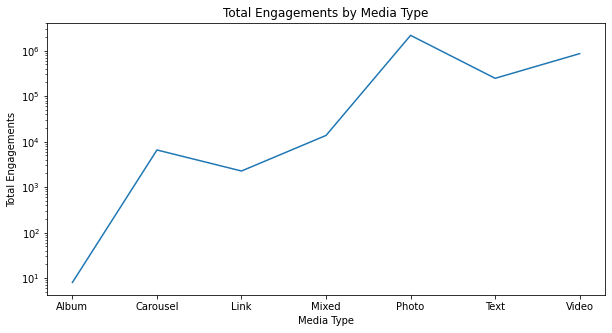

Best Performing Media Type: Photo
Total Engagements: 2167739


In [15]:

# Group the data by media type and calculate the total engagements
media_metrics = df.groupby('Media_Type')['Total_Engagements'].sum()

# Plot the total engagements for each media type
media_metrics.plot(kind='line', figsize=(10, 5))
plt.xlabel('Media Type')
plt.ylabel('Total Engagements')
plt.title('Total Engagements by Media Type')
plt.yscale('log')  # Set logarithmic scale for the y-axis

plt.show()

# Find the media type with the highest total engagements
best_media_type = media_metrics.idxmax()
max_engagements = media_metrics.max()

print("Best Performing Media Type:", best_media_type)
print("Total Engagements:", max_engagements)


#### The best performing media type is "Photo" with a total of 2,167,739 engagements. This indicates that photos have generated the highest level of engagement compared to other media types in our dataset. On other hand Album has lowest number of engagements so it is least performing media type.

## 5. What is our best performing campaign? 

In [16]:
unique_entities = df['Campaign_Name'].value_counts()
num_entries = len(df)
print(unique_entities)
print("Number of Entries:", num_entries)

N/A                      1485
Community Engagement     1411
Evil Exhibited            420
Evergreen                 163
Name: Campaign_Name, dtype: int64
Number of Entries: 3479


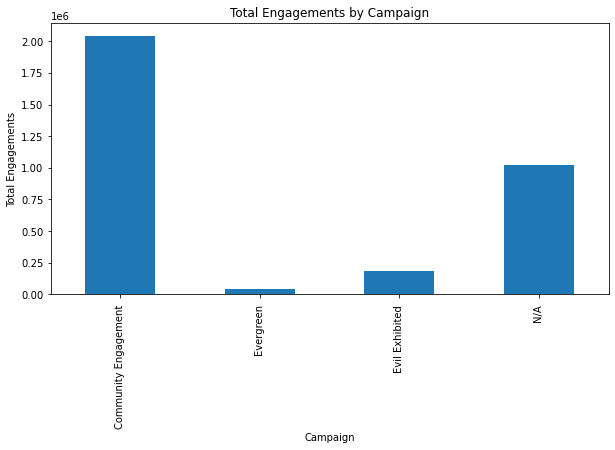

Best Performing Campaign: Community Engagement 
Total Engagements: 2044767


In [17]:
# Group the data by campaign and calculate the total engagements

campaign_metrics = df.groupby('Campaign_Name')['Total_Engagements'].sum()

campaign_metrics.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Campaign')
plt.ylabel('Total Engagements')
plt.title('Total Engagements by Campaign')
plt.show()

# Find the campaign with the highest total engagements
best_campaign = campaign_metrics.idxmax()
total_engagements = campaign_metrics.loc[best_campaign]

print("Best Performing Campaign:", best_campaign)
print("Total Engagements:", total_engagements)

#### The community engagement campaign, which has received the most engagements (2044767), is the top performer in this case. Conversely, Evergreen campaign has the lowest participation rates. Furthermore, since N/A entities also have engagement and impression entires, in addition to having the mid level lower than Community and greater than Evergreen, so are unable to eliminate N/A.

## 6. Define out a posting strategy for our social channels based on your discoveries.

#### 1) Game Titles: Focus on promoting the high-performing game titles, such as DOTA2 and CSGO, which have shown the highest engagement and impression rates. Allocate more content and resources to these games to leverage their success and engage with the audience.

#### 2) Posting Days and Times: Schedule your posts on Tuesday, Sunday, and Thursday, as these days have demonstrated higher average engagement rates. Additionally, aim to post during the peak engagement time window, between 13:16 and 14:58. Avoid posting during the lower engagement time period, typically between 11:30 and 13:16.

#### 3) Media Types: Emphasize the use of photos in your social media content, as they have shown the highest level of engagement. Incorporate visually appealing images related to the games and campaigns to capture the audience's attention and generate more interactions.

#### 4) Campaign Focus: Give priority to the "Community Engagement" campaign, as it has received the highest number of engagements. Allocate resources and promotional efforts to this campaign to drive further engagement and participation from the community. Monitor the performance of other campaigns and adjust your strategy accordingly.

#### 5) Continuous Monitoring and Adaptation: Regularly track and analyze the social performance metrics to evaluate the effectiveness of your posting strategy. Stay updated with trends, engage with your audience through comments and messages, and adapt your approach based on their feedback and interests.

## 7. What suggestions would you give to the social media team if they want to expand their presence (e.g. if our CSGO youtube channel is doing well should we expand to TikTok)?

#### 1) Analyze Audience Demographics: Understand the demographics and interests of current audience on platforms like YouTube for CSGO. Identify if there is an overlap with the user base on other platforms such as TikTok. If there is a potential alignment, it can be a good opportunity to expand to TikTok and tap into a new and potentially younger audience.

#### 2) Assess Platform Relevance: Evaluate the relevance and suitability of each platform based on the nature of your content and target audience. Consider the type of content that performs well on TikTok and assess if it aligns with your brand and CSGO channel content. Determine if TikTok's short-form, highly engaging and visually appealing videos can effectively showcase CSGO content and attract the desired audience.

#### 3) Utilize Cross-Promotion: Leverage your existing social media channels, such as the CSGO YouTube channel, to promote and drive traffic to your new platform. Mention and link your TikTok account in your YouTube video descriptions, channel banner, or pinned comments. Encourage your YouTube subscribers to follow you on TikTok for additional content and behind-the-scenes glimpses.

#### 4) Monitor Performance: Regularly analyze the performance metrics of your TikTok account to assess its effectiveness in reaching and engaging with the desired audience. Pay attention to factors such as views, likes, shares, and comments. Adjust your content strategy based on the insights you gather and continue to optimize your presence on the platform.

#### 5) Open to New Opportunities: While expanding to TikTok can be a valuable step, be open to exploring other emerging platforms that align with your target audience and brand. Keep an eye on new trends and platforms that may provide unique opportunities for expanding your social media presence.

#### So, expanding to new platforms requires a thoughtful approach and investment of resources. It's essential to assess the potential benefits, align with your brand strategy, and evaluate the platform's relevance to your target audience. With the right content and strategy, expanding your presence can help you reach new audiences and drive further growth.